# **2016 mlb season**
    -I am a baseball fans, so I choose MLB(Major League Baseball) data to analyze  
    -此筆資料是對MLB30支球隊每場主場賽事的結算資料統計
        -home team：主場、away team：客場、hits：安打、runs：得分、errors：失誤
    
https://www.kaggle.com/cyaris/2016-mlb-season

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
path = './baseball_reference_2016_clean.csv'
pd_data = pd.read_csv('./baseball_reference_2016_clean.csv')

## MLB 各隊伍主客場勝率
    * 隊伍的主客場勝率主要還是和隊伍強度有關（我主場勝率>你主場勝率、我客場勝率>你客場勝率）
        * 如編號4的小熊隊主客場勝率都相當高，最後也拿下世界大賽冠軍
        * 但編號16的雙城隊勝率主客場都很悽慘，最後成績59勝103敗成為當年爐主
    * 大部分隊伍主場勝率優於客場勝率（主場安排賽事多、在主場練球，較熟悉場地，有優勢），下方圓餅圖數據可以佐證，但還是有些例外，如編號25的紅鵲隊，

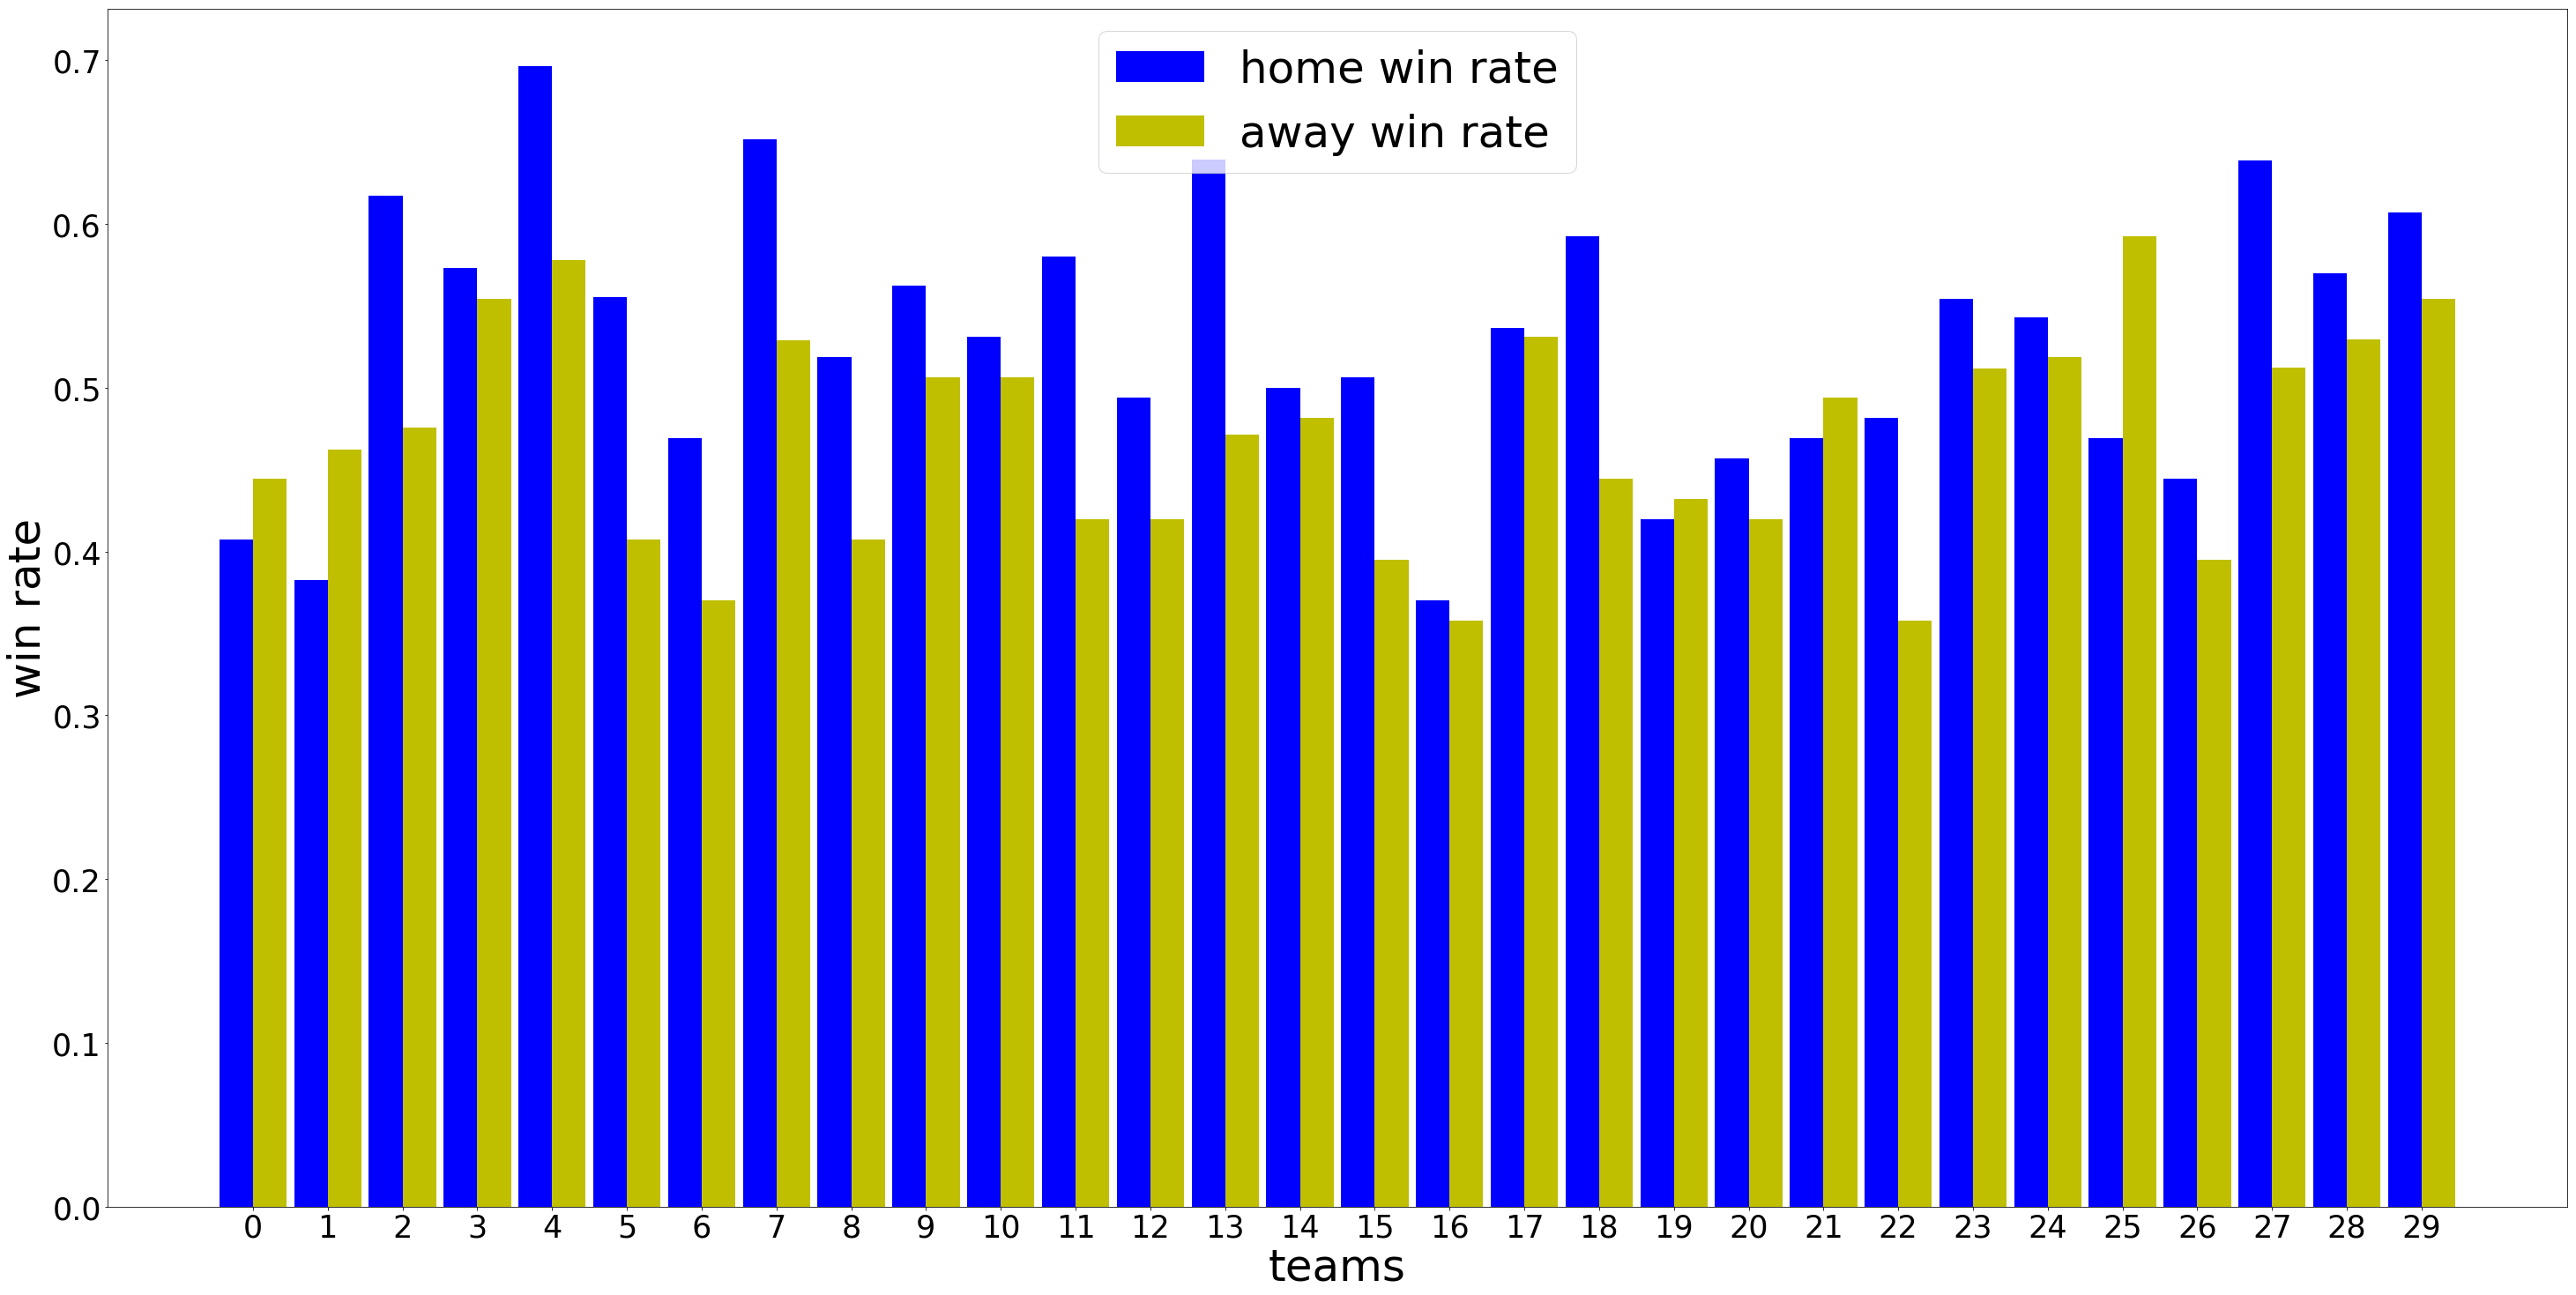

In [172]:
home_win_rate = pd_data.groupby('home_team')['home_team_win']\
    .mean().reset_index(name = 'home win rate')
away_win_rate = pd_data.groupby('away_team')['home_team_loss']\
    .mean().reset_index(name = 'away win rate')

plt.figure(figsize = (50, 25))
index = np.arange(30)
bar_width = 0.45
plt.bar(index, home_win_rate['home win rate'], bar_width, color = 'b', label = 'home win rate')
plt.bar(index+bar_width, away_win_rate['away win rate'], bar_width, color = 'y', label = 'away win rate')
plt.xticks(index+bar_width/2, index, fontsize = 35)
plt.yticks(fontsize = 35)
plt.xlabel('teams', fontsize = 50)
plt.ylabel('win rate', fontsize = 50)
plt.legend(loc = 'upper center', fontsize = 50)
plt.show()

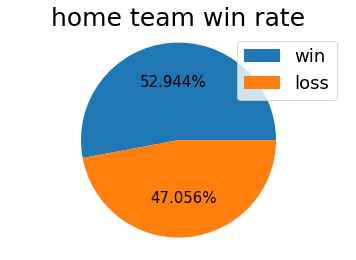

In [169]:
win = pd_data['home_team_outcome'].value_counts()[0]
loss = pd_data['home_team_outcome'].value_counts()[1]
label = ['win', 'loss']
plt.pie([win, loss], autopct='%1.3f%%', textprops = {'fontsize':15})
plt.axis('equal')
plt.title('home team win rate', fontsize = '25')
plt.legend(label, fontsize = '18')
plt.show()

## 影響隊伍主場勝率因素
    -由圖可見，隊伍的勝率主要和失誤（errors）、安打（hits）、得分（runs）三項數據最有關係
    -主導勝負的是得分數，而安打數直接影響得分，因此這兩項與勝負的相關性最高
    -失誤影響雖不及安打，但mlb場均失誤低，發生失誤仍會影響戰局，因此降低失誤率還是很重要
    -而球場當天的溫度、風速和觀眾數，對戰局幾乎沒有影響

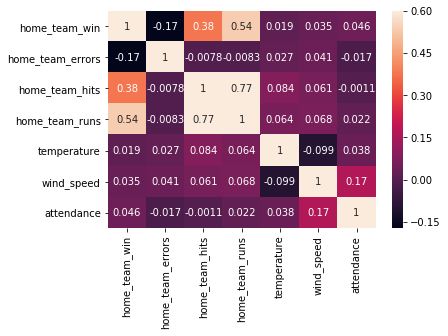

In [196]:
an = pd_data[['home_team_win', 'home_team_errors', 'home_team_hits', 'home_team_runs', 'temperature', 'wind_speed', 'attendance']]
an = an.corr()
sns.heatmap(an, annot = True, vmax = 0.6)